In [178]:
import pandas as pd
import numpy as np
import random as rd
from matplotlib import pyplot as plt
DATASET = 1000
CONTROL = 0.3
TREATMENT = 0.7
NO_ATT = 0.2
ATT = 0.8
START_1 = 0.05
START_2 = 0.25
START_3 = 0.4
START_4 = 0.3

def generate_dataset(random_seed = 0):
    np.random.seed(random_seed)
    rd.seed(random_seed)

    data = pd.DataFrame({'received_email' : []})

    # Generate the user assignment
    control = [0]*int(DATASET*CONTROL)
    treatment = [1]*int(DATASET*TREATMENT)
    received_email = control + treatment
    # Shuffle it
    rd.shuffle(received_email)
    data['received_email'] = received_email

    # Generate if they attempted the homework or not
    no_attempt = [0]*int(DATASET*NO_ATT)
    attempt = [1]*int(DATASET*ATT)
    attempted = no_attempt + attempt
    # Shuffle it
    rd.shuffle(attempted)
    data['attempted'] = attempted

    # Generate hours before deadline that sutdents started the homework
    # People who started really early: between 65 to 80 hrs before
    arr_start1 = np.random.randint(65, 80, int(DATASET*START_1)).tolist()
    # People who started in the middle: between 40 to 64 hrs before
    arr_start2 = np.random.randint(40, 65, int(DATASET*START_2)).tolist()
    # Poeple who started late: between 20 to 39 hrs before
    arr_start3 = np.random.randint(20, 39, int(DATASET*START_3)).tolist()
    # People who started really late: between 1 to 19 hrs before
    arr_start4 = np.random.randint(1, 19, int(DATASET*START_4)).tolist()
    start_hours = arr_start1 + arr_start2 + arr_start3 + arr_start4
    rd.shuffle(start_hours)
    
    for i in range(0, len(start_hours)):
        if received_email[i] == 1:
            start_hours[i] += np.random.uniform(0, 20)
    data['start_hours'] = start_hours

    # data.to_csv("sim_data.csv")

    return data
data = generate_dataset(0)
attempted_list = data["attempted"].to_numpy()
start_hours_list = data["start_hours"].to_numpy()
received_email_list = data["received_email"].to_numpy()

# Plot the distributions of start_hour for those who received email and those who didn't as an initial look

Since the number of people who have received email differs from the number of people who did not receive an email, I plotted the two as histograms normalized by the respective size of each class (received vs not received). 

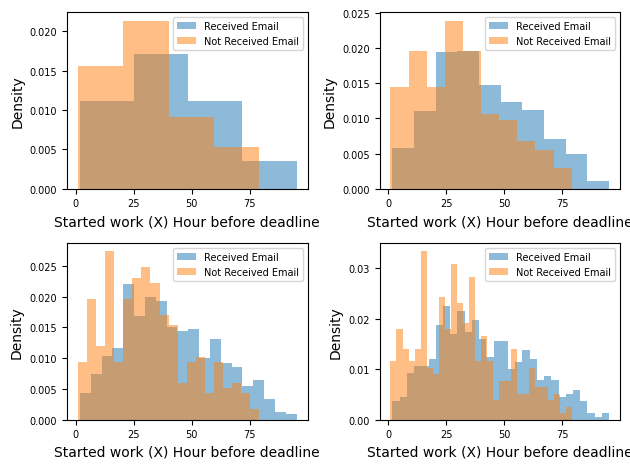

In [179]:
bin_size = [4, 10, 20, 30]
for i in range(0, 4):
    # plt.figure(figsize=(10, 10))
    # space out the subplots and make the text smaller 
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # make the overall figure bigger
    
    plt.subplot(2, 2, i+1)
    start_hours_of_received_email = data[data["received_email"] == 1]["start_hours"].to_numpy()
    start_hours_of_not_received_email = data[data["received_email"] == 0]["start_hours"].to_numpy()
    plt.hist(start_hours_of_received_email, bins=bin_size[i], alpha=0.5, label="Received Email", density=True)
    plt.hist(start_hours_of_not_received_email, bins=bin_size[i], alpha=0.5, label="Not Received Email", density=True)
    plt.legend(loc='upper right')
    # make the legend smaller
    plt.legend(prop={'size': 7})
    # plt.title("Distribution of Start Hours between Received and Not Received Email")
    plt.xlabel("Started work (X) Hour before deadline")
    plt.ylabel("Density")
    # make x and y label smaller
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.tight_layout()


# Do the same but with a kernel to smoothout the points

In [180]:
from scipy.stats import distributions
class GaussianKernal:
    def __init__(self, loc, sigma, amplitude):
        self.sigma = sigma
        self.loc = loc * 1.0
        self.amplitude = amplitude
        self.gaussina = distributions.norm(loc, sigma)
    def cumulate(self, t_arr, x_arr):
        # t_arr is the time array
        # x_arr is the value array, in which we will cumulate a series of GaussianKernals
        x_arr += self.amplitude * self.gaussina.pdf(t_arr)
        return x_arr

def generate_smooth_distribution(values):
    # generate a smooth distribution of the fixation ang
    kernal_list = []
    kernal_std = 3
    kernal_amplitude = 1
    for i in range(len(values)):
        kernal_list.append(GaussianKernal(values[i], kernal_std, kernal_amplitude))
    t_arr = np.linspace(-5, 90, 500)
    x_arr = np.zeros(t_arr.shape)
    for kernal in kernal_list:
        x_arr = kernal.cumulate(t_arr, x_arr)
    x_arr = x_arr/np.sum(x_arr)
    return t_arr, x_arr, kernal_list

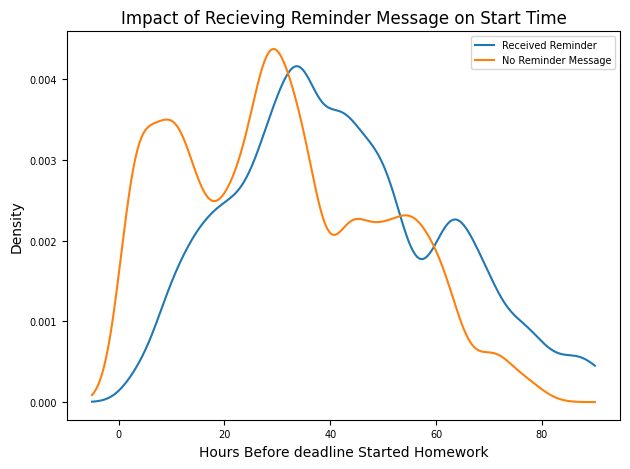

In [210]:
start_hours_of_received_email = data[data["received_email"] == 1]["start_hours"].to_numpy()
start_hours_of_not_received_email = data[data["received_email"] == 0]["start_hours"].to_numpy()
t_arr_recieved, x_arr_recieved, kernal_list_recieved = generate_smooth_distribution(start_hours_of_received_email)
t_arr_not_recieved, x_arr_not_recieved, kernal_list_not_recieved = generate_smooth_distribution(start_hours_of_not_received_email)
plt.plot(t_arr_recieved, x_arr_recieved, label="Received Reminder")
plt.plot(t_arr_not_recieved, x_arr_not_recieved, label="No Reminder Message")
plt.legend(loc='upper right')
plt.legend(prop={'size': 7})
plt.xlabel("Hours Before deadline Started Homework")
plt.ylabel("Density")
plt.title("Impact of Recieving Reminder Message on Start Time")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

# Look at the number of students who have attempted vs received an email

In [198]:
attempted_and_received_email = attempted_list[received_email_list==1].sum()
attempted_and_no_email = attempted_list[received_email_list==0].sum()
no_attempt_and_received_email = len(attempted_list[received_email_list==1]) - attempted_and_received_email
no_attempt_and_no_email = len(attempted_list[received_email_list==0]) - attempted_and_no_email

print("attempted_and_received_email", attempted_and_received_email)
print("attempted_and_no_email", attempted_and_no_email)
print("no_attempt_and_received_email", no_attempt_and_received_email)
print("no_attempt_and_no_email", no_attempt_and_no_email)

print("attempted_and_received_email", attempted_and_received_email/len(attempted_list[received_email_list==1]))
print("attempted_and_no_email", attempted_and_no_email/len(attempted_list[received_email_list==0]))
print("no_attempt_and_received_email", no_attempt_and_received_email/len(attempted_list[received_email_list==1]))
print("no_attempt_and_no_email", no_attempt_and_no_email/len(attempted_list[received_email_list==0]))



attempted_and_received_email 562
attempted_and_no_email 238
no_attempt_and_received_email 138
no_attempt_and_no_email 62
attempted_and_received_email 0.8028571428571428
attempted_and_no_email 0.7933333333333333
no_attempt_and_received_email 0.19714285714285715
no_attempt_and_no_email 0.20666666666666667


# Compute Statistics:

In [182]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

In [208]:
def plot_distribution_of_bournouli_vars(p_a, se_a, p_b, se_b, N_A, N_B):
    # Making a bar for explanation A
    plt.bar(x=0, height=p_a)
    plt.errorbar(x=0, y=p_a, yerr=se_a, color='black', capsize=5, linewidth=1)
    fd = {'fontweight':'bold', 'fontsize': 14, 'color': 'white'}
    plt.text(0, 0.15, f"mean = {p_a:.2f}\nN = {N_A}", 
        horizontalalignment="center", fontdict=fd)

    # Making a bar for explanation B
    plt.bar(x=1, height=p_b)
    plt.errorbar(x=1, y=p_b, yerr=se_b, color='black', capsize=5, linewidth=1)
    plt.text(1, 0.10, f"mean = {p_b:.2f}\nN = {N_B}", 
            horizontalalignment="center", fontdict=fd)

    # Adding labels to the plot
    plt.xticks([0, 1], labels=['Explanation A', 'Explanation B'])
    plt.ylabel("Mean explanation success")
def wald_test(condition_1, condition_2, display=False):
    # condition 1 and 2 are bornoulli random variables
    p_a = condition_1.mean()
    p_b = condition_2.mean()
    N_A = len(condition_1)
    N_B = len(condition_2)
    se_a = np.sqrt((p_a*(1-p_a))/N_A)
    se_b = np.sqrt((p_b*(1-p_b))/N_B)
    # print(p_a, p_b)
    if display:
        plot_distribution_of_bournouli_vars(p_a, se_a, p_b, se_b, N_A, N_B)
        plt.show()
    delta = p_a - p_b
    se = np.sqrt((p_a*(1-p_a)) / N_A  +  (p_b*(1-p_b)) / N_B)
    # test_statistics
    W = (delta - 0) / se

# critical value
    alpha = 0.00005
    norm = stats.norm(loc=0, scale=1)
    z = norm.ppf(1-(alpha/2))
    if display:
        print(f'z_alpha/2 = {z:.2f}')
        print(f'W = {W:.2f}')
        if W > z:
            print(f'W > z_alpha/2, reject null hypothesis')
        else:
            print(f'W < z_alpha/2, fail to reject null hypothesis')
    return z, W

def wald_test_attempt(condition_1, condition_2, display=False):
    # condition 1 and 2 are bornoulli random variables
    p_a = condition_1.mean()
    p_b = condition_2.mean()
    N_A = len(condition_1)
    N_B = len(condition_2)
    se_a = np.sqrt((p_a*(1-p_a))/N_A)
    se_b = np.sqrt((p_b*(1-p_b))/N_B)
    # print(p_a, p_b)
    if display:
        # Making a bar for explanation A
        plt.bar(x=0, height=p_a)
        plt.errorbar(x=0, y=p_a, yerr=se_a, color='black', capsize=5, linewidth=1)
        fd = {'fontweight':'bold', 'fontsize': 14, 'color': 'white'}
        plt.text(0, 0.15, f"mean = {p_a:.2f}\nN = {N_A}", 
            horizontalalignment="center", fontdict=fd)

        # Making a bar for explanation B
        plt.bar(x=1, height=p_b)
        plt.errorbar(x=1, y=p_b, yerr=se_b, color='black', capsize=5, linewidth=1)
        plt.text(1, 0.10, f"mean = {p_b:.2f}\nN = {N_B}", 
                horizontalalignment="center", fontdict=fd)

        # Adding labels to the plot
        plt.xticks([0, 1], labels=['Received Email', 'Not Received Email'])
        plt.ylabel("Mean Attempted Rate")
        plt.show()
    delta = p_a - p_b
    se = np.sqrt((p_a*(1-p_a)) / N_A  +  (p_b*(1-p_b)) / N_B)
    # test_statistics
    W = (delta - 0) / se

# critical value
    alpha = 0.00005
    norm = stats.norm(loc=0, scale=1)
    z = norm.ppf(1-(alpha/2))
    if display:
        print(f'z_alpha/2 = {z:.2f}')
        print(f'W = {W:.2f}')
        if W > z:
            print(f'W > z_alpha/2, reject null hypothesis')
        else:
            print(f'W < z_alpha/2, fail to reject null hypothesis')
    return z, W

def wald_test_last_X_hours(condition_1, condition_2, display=False, hours = 20):
    # condition 1 and 2 are bornoulli random variables
    p_a = condition_1.mean()
    p_b = condition_2.mean()
    N_A = len(condition_1)
    N_B = len(condition_2)
    se_a = np.sqrt((p_a*(1-p_a))/N_A)
    se_b = np.sqrt((p_b*(1-p_b))/N_B)
    # print(p_a, p_b)
    if display:
        # Making a bar for explanation A
        plt.bar(x=0, height=p_a)
        plt.errorbar(x=0, y=p_a, yerr=se_a, color='black', capsize=5, linewidth=1)
        fd = {'fontweight':'bold', 'fontsize': 14, 'color': 'white'}
        plt.text(0, 0.15, f"mean = {p_a:.2f}\nN = {N_A}", 
            horizontalalignment="center", fontdict=fd)

        # Making a bar for explanation B
        plt.bar(x=1, height=p_b)
        plt.errorbar(x=1, y=p_b, yerr=se_b, color='black', capsize=5, linewidth=1)
        plt.text(1, 0.10, f"mean = {p_b:.2f}\nN = {N_B}", 
                horizontalalignment="center", fontdict=fd)

        # Adding labels to the plot
        plt.xticks([0, 1], labels=['Not Received Email', 'Received Email'])
        plt.ylabel("Rate of Starting Homework \nwithin {} hours from deadline ".format(hours))
        plt.show()
    delta = p_a - p_b
    se = np.sqrt((p_a*(1-p_a)) / N_A  +  (p_b*(1-p_b)) / N_B)
    # test_statistics
    W = (delta - 0) / se

# critical value
    alpha = 0.00005
    norm = stats.norm(loc=0, scale=1)
    z = norm.ppf(1-(alpha/2))
    if display:
        print(f'z_alpha/2 = {z:.2f}')
        print(f'W = {W:.2f}')
        if W > z:
            print(f'W > z_alpha/2, reject null hypothesis')
        else:
            print(f'W < z_alpha/2, fail to reject null hypothesis')
    return z, W

In [184]:
# np.where(received_email==1, True, False)
# filter attempted_list such that we only have attempted_list when received_email == 1
attempted_list_received = attempted_list[received_email_list==1]

Wald Test for whether email reminder affected rate of Attempting Homework


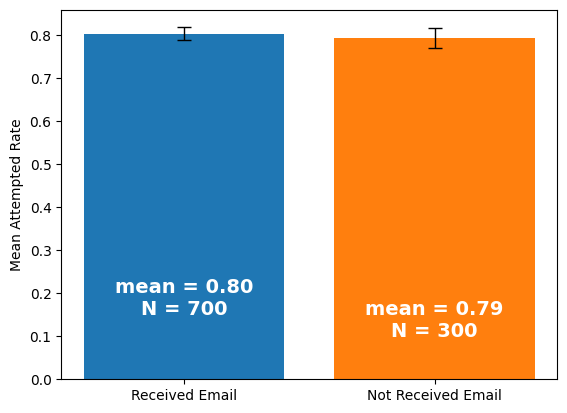

z_alpha/2 = 4.06
W = 0.34
W < z_alpha/2, fail to reject null hypothesis


(4.0556269811219074, 0.3426297840370656)

In [206]:
print("Wald Test for whether email reminder affected rate of Attempting Homework")
received_email_and_attempted = attempted_list[received_email_list==1]
didnt_receive_email_and_attempted = attempted_list[received_email_list==0]
wald_test_attempt(received_email_and_attempted, didnt_receive_email_and_attempted, True)

Wald Test for whether email reminder affected time of starting homework 24 hours before


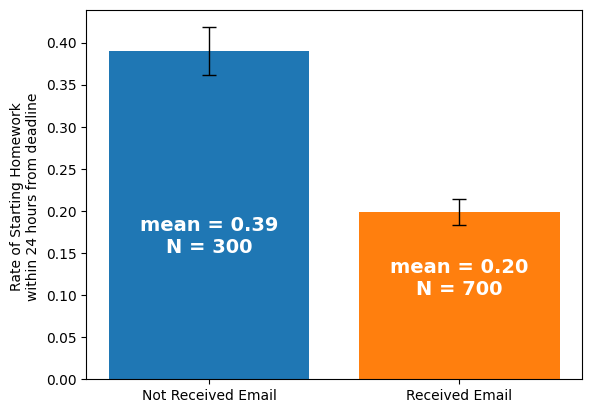

z_alpha/2 = 4.06
W = 5.99
W > z_alpha/2, reject null hypothesis
Wald Test for whether email reminder affected time of starting homework 48 hours before


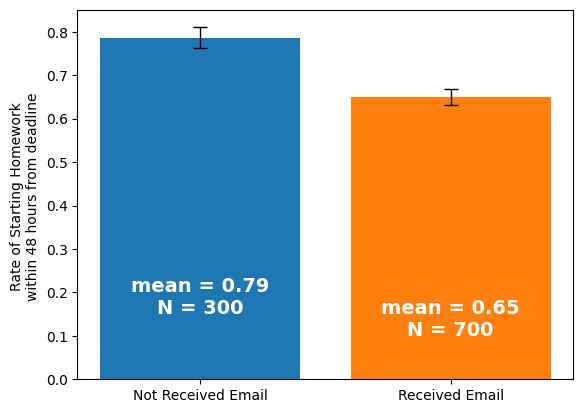

z_alpha/2 = 4.06
W = 4.60
W > z_alpha/2, reject null hypothesis
Wald Test for whether email reminder affected time of starting homework 72 hours before


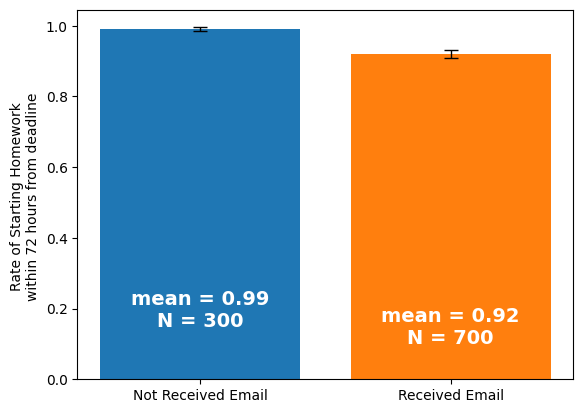

z_alpha/2 = 4.06
W = 5.96
W > z_alpha/2, reject null hypothesis


(4.0556269811219074, 5.955713845068724)

In [209]:
started_homework_24_hours_before_or_not = np.where(start_hours_list<=24, True, False)
started_homework_48_hours_before_or_not = np.where(start_hours_list<=48, True, False)
started_homework_72_hours_before_or_not = np.where(start_hours_list<=72, True, False)

received_email_and_started_homework_24_hours_before = started_homework_24_hours_before_or_not[received_email_list==1]
didnt_receive_email_and_started_homework_24_hours_before = started_homework_24_hours_before_or_not[received_email_list==0]
print("=======================================================================================")
print("Wald Test for whether email reminder affected time of starting homework 24 hours before")
wald_test_last_X_hours(didnt_receive_email_and_started_homework_24_hours_before, received_email_and_started_homework_24_hours_before, True, 24)

received_email_and_started_homework_48_hours_before = started_homework_48_hours_before_or_not[received_email_list==1]
didnt_receive_email_and_started_homework_48_hours_before = started_homework_48_hours_before_or_not[received_email_list==0]
print("=======================================================================================")
print("Wald Test for whether email reminder affected time of starting homework 48 hours before")
wald_test_last_X_hours(didnt_receive_email_and_started_homework_48_hours_before, received_email_and_started_homework_48_hours_before, True, 48)

received_email_and_started_homework_72_hours_before = started_homework_72_hours_before_or_not[received_email_list==1]
didnt_receive_email_and_started_homework_72_hours_before = started_homework_72_hours_before_or_not[received_email_list==0]
print("=======================================================================================")
print("Wald Test for whether email reminder affected time of starting homework 72 hours before")
wald_test_last_X_hours(didnt_receive_email_and_started_homework_72_hours_before, received_email_and_started_homework_72_hours_before, True, 72)


# Prefilter out those who have not attempted

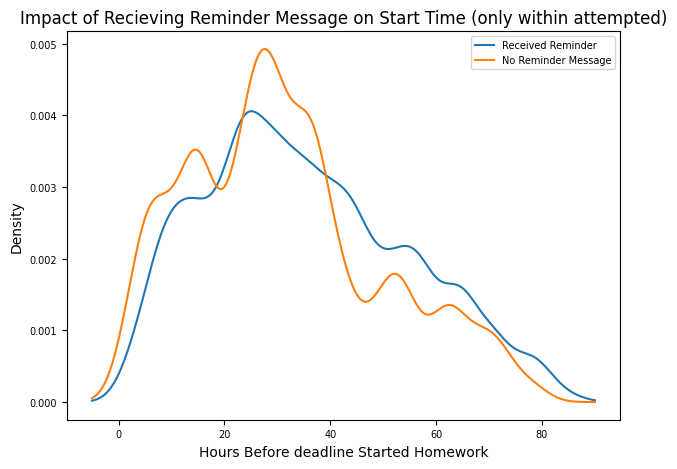

In [176]:
# prefilter out data of those who have not attempted and repeat above analysis
data_attempted = data[data["attempted"]==1]
attempted_list = data_attempted["attempted"].to_numpy()
start_hours_list = data_attempted["start_hours"].to_numpy()
received_email_list = data_attempted["received_email"].to_numpy()

start_hours_of_received_email = data_attempted[data_attempted["received_email"] == 1]["start_hours"].to_numpy()
start_hours_of_not_received_email = data_attempted[data_attempted["received_email"] == 0]["start_hours"].to_numpy()

t_arr_recieved, x_arr_recieved, kernal_list_recieved = generate_smooth_distribution(start_hours_of_received_email)
t_arr_not_recieved, x_arr_not_recieved, kernal_list_not_recieved = generate_smooth_distribution(start_hours_of_not_received_email)
plt.plot(t_arr_recieved, x_arr_recieved, label="Received Reminder")
plt.plot(t_arr_not_recieved, x_arr_not_recieved, label="No Reminder Message")
plt.legend(loc='upper right')
plt.legend(prop={'size': 7})
plt.xlabel("Hours Before deadline Started Homework")
plt.ylabel("Density")
plt.title("Impact of Recieving Reminder Message on Start Time (only within attempted)")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

In [98]:
started_homework_24_hours_before_or_not = np.where(start_hours_list<=24, True, False)
started_homework_48_hours_before_or_not = np.where(start_hours_list<=48, True, False)
started_homework_72_hours_before_or_not = np.where(start_hours_list<=72, True, False)

received_email_and_started_homework_24_hours_before = started_homework_24_hours_before_or_not[received_email_list==1]
didnt_receive_email_and_started_homework_24_hours_before = started_homework_24_hours_before_or_not[received_email_list==0]
print("=======================================================================================")
print("Wald Test for whether email reminder affected time of starting homework 24 hours before")
wald_test(received_email_and_started_homework_24_hours_before, didnt_receive_email_and_started_homework_24_hours_before)

received_email_and_started_homework_48_hours_before = started_homework_48_hours_before_or_not[received_email_list==1]
didnt_receive_email_and_started_homework_48_hours_before = started_homework_48_hours_before_or_not[received_email_list==0]
print("=======================================================================================")
print("Wald Test for whether email reminder affected time of starting homework 48 hours before")
wald_test(received_email_and_started_homework_48_hours_before, didnt_receive_email_and_started_homework_48_hours_before)

received_email_and_started_homework_72_hours_before = started_homework_72_hours_before_or_not[received_email_list==1]
didnt_receive_email_and_started_homework_72_hours_before = started_homework_72_hours_before_or_not[received_email_list==0]
print("=======================================================================================")
print("Wald Test for whether email reminder affected time of starting homework 72 hours before")
wald_test(received_email_and_started_homework_72_hours_before, didnt_receive_email_and_started_homework_72_hours_before)


Wald Test for whether email reminder affected time of starting homework 24 hours before
Wald Test for whether email reminder affected time of starting homework 48 hours before
Wald Test for whether email reminder affected time of starting homework 72 hours before


(4.0556269811219074, -0.2940628305805389)

In [192]:
has_sigificant_effect = []
for i in range(0, 1000):
    # generate a new dataset
    data = generate_dataset(random_seed=i)
    attempted_list = data["attempted"].to_numpy()
    start_hours_list = data["start_hours"].to_numpy()
    received_email_list = data["received_email"].to_numpy()
    started_homework_24_hours_before_or_not = np.where(start_hours_list<=24, True, False)
    started_homework_48_hours_before_or_not = np.where(start_hours_list<=48, True, False)
    started_homework_72_hours_before_or_not = np.where(start_hours_list<=72, True, False)

    received_email_and_started_homework_24_hours_before = started_homework_24_hours_before_or_not[received_email_list==1]
    didnt_receive_email_and_started_homework_24_hours_before = started_homework_24_hours_before_or_not[received_email_list==0]
    z24, W24 = wald_test(didnt_receive_email_and_started_homework_24_hours_before, received_email_and_started_homework_24_hours_before, False)

    received_email_and_started_homework_48_hours_before = started_homework_48_hours_before_or_not[received_email_list==1]
    didnt_receive_email_and_started_homework_48_hours_before = started_homework_48_hours_before_or_not[received_email_list==0]
    z48, W48 = wald_test(didnt_receive_email_and_started_homework_48_hours_before, received_email_and_started_homework_48_hours_before, False)

    received_email_and_started_homework_72_hours_before = started_homework_72_hours_before_or_not[received_email_list==1]
    didnt_receive_email_and_started_homework_72_hours_before = started_homework_72_hours_before_or_not[received_email_list==0]
    z_72, W72 = wald_test(didnt_receive_email_and_started_homework_72_hours_before, received_email_and_started_homework_72_hours_before, False)
    significant = []
    if W24 > z24:
        significant.append(24)
    if W48 > z48:
        significant.append(48)
    if W72 > z_72:
        significant.append(72)
    if len(significant) > 0:
        has_sigificant_effect.append([i, significant])
for i in range(0, len(has_sigificant_effect)):
    # join the list of hours into a string, the list are integers
    print("random seed {} ".format(has_sigificant_effect[i][0]) + "has an affect on getting people to start their homework {} hours before deadline".format(",".join(str(x) for x in has_sigificant_effect[i][1])))

random seed 0 has an affect on getting people to start their homework 24,48 hours before deadline
random seed 1 has an affect on getting people to start their homework 24 hours before deadline
random seed 2 has an affect on getting people to start their homework 24,48 hours before deadline
random seed 3 has an affect on getting people to start their homework 24 hours before deadline
random seed 4 has an affect on getting people to start their homework 24,48 hours before deadline
random seed 5 has an affect on getting people to start their homework 24 hours before deadline
random seed 6 has an affect on getting people to start their homework 24 hours before deadline
random seed 7 has an affect on getting people to start their homework 24,48 hours before deadline
random seed 8 has an affect on getting people to start their homework 24 hours before deadline
random seed 9 has an affect on getting people to start their homework 24 hours before deadline
random seed 10 has an affect on gettin

[]